Melakukan Import Library

In [ ]:
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


Menghubungkan ke google drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menghubungkan file dataset yang berada di google drive dengan colab

In [ ]:
folder_path = '/content/drive/MyDrive/Kel2_ulos'

Membaca filepaths dan labels

In [ ]:
filepaths = []
labels = []
classlist = os.listdir(folder_path)

In [ ]:
for klass in classlist:
    classpath = os.path.join(folder_path, klass)

    if os.path.isdir(classpath):
        flist = os.listdir(classpath)

        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)


Membuat DataFrame

In [ ]:
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})


Mengacak DataFrame

In [ ]:
df = shuffle(df, random_state=42)

Membagi data menjadi train dan test

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

Membuat generator untuk data train

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

Split Data

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filepaths',
    y_col='labels',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 480 validated image filenames belonging to 6 classes.


Membuat generator untuk data validasi

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='filepaths',
    y_col='labels',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 120 validated image filenames belonging to 6 classes.


Membangun model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

Mengompilasi model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Membuat EarlyStopping Callback

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

Membuat Callback ReduceLROnPlateau

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

Melatih model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

Epoch 1/15
8/8 - 68s - loss: 1.2186 - accuracy: 0.5354 - val_loss: 0.7871 - val_accuracy: 0.5750 - lr: 0.0010 - 68s/epoch - 8s/step
Epoch 2/15
8/8 - 69s - loss: 0.6519 - accuracy: 0.7292 - val_loss: 0.5245 - val_accuracy: 0.7917 - lr: 0.0010 - 69s/epoch - 9s/step
Epoch 3/15
8/8 - 85s - loss: 0.5830 - accuracy: 0.7708 - val_loss: 0.2937 - val_accuracy: 0.8917 - lr: 0.0010 - 85s/epoch - 11s/step
Epoch 4/15
8/8 - 82s - loss: 0.3528 - accuracy: 0.8521 - val_loss: 0.5708 - val_accuracy: 0.7833 - lr: 0.0010 - 82s/epoch - 10s/step
Epoch 5/15
8/8 - 68s - loss: 0.2994 - accuracy: 0.8854 - val_loss: 0.2184 - val_accuracy: 0.9000 - lr: 0.0010 - 68s/epoch - 9s/step
Epoch 6/15
8/8 - 69s - loss: 0.1943 - accuracy: 0.9354 - val_loss: 0.1347 - val_accuracy: 0.9583 - lr: 0.0010 - 69s/epoch - 9s/step
Epoch 7/15
8/8 - 67s - loss: 0.1426 - accuracy: 0.9563 - val_loss: 0.1061 - val_accuracy: 0.9500 - lr: 0.0010 - 67s/epoch - 8s/step
Epoch 8/15
8/8 - 68s - loss: 0.1489 - accuracy: 0.9500 - val_loss: 0.1485 

Menamppilkan grafik hasil pelatihan

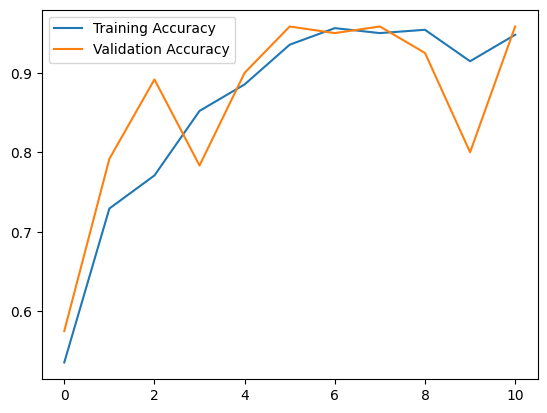

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Menampilkan grafik loss

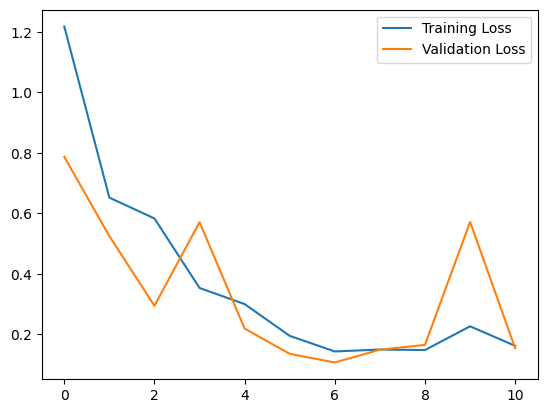

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Melakukan evaluasi model pada data validasi

In [ ]:
y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

2/2 [==============================] - 11s 5s/step


In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=2)
print("Test accuracy:", test_acc)

2/2 - 11s - loss: 0.1347 - accuracy: 0.9583 - 11s/epoch - 6s/step
Test accuracy: 0.9583333134651184


Menghitung Precision, Recall, dan F1-Score

In [ ]:
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels.values()))

Classification Report:
                  precision    recall  f1-score   support

   Batak_Angkola       1.00      0.86      0.93        22
      Batak_Karo       0.90      1.00      0.95        19
Batak_Mandailing       0.88      1.00      0.93        21
    Batak_PakPak       1.00      1.00      1.00        18
Batak_Simalungun       1.00      0.91      0.95        22
      Batak_Toba       1.00      1.00      1.00        18

        accuracy                           0.96       120
       macro avg       0.96      0.96      0.96       120
    weighted avg       0.96      0.96      0.96       120



Confusion Matrix

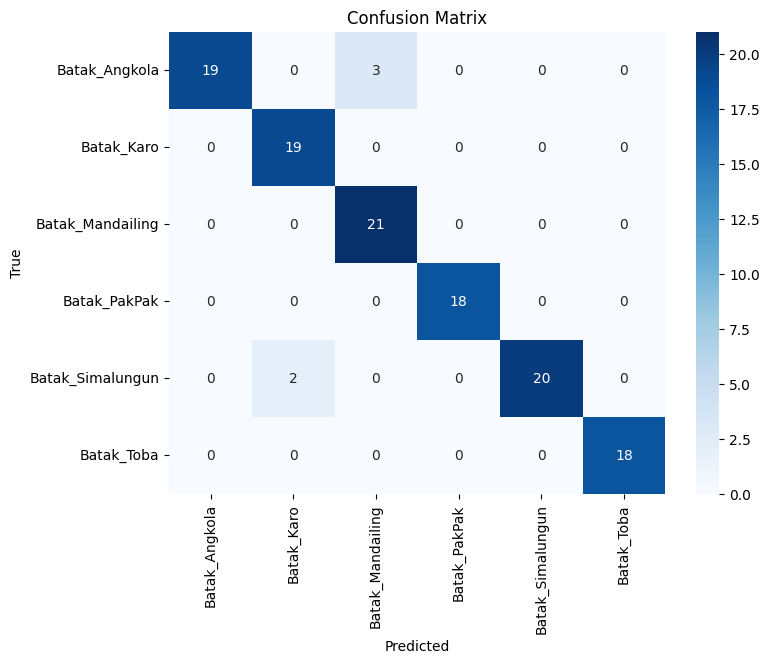

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Menyimpan Model

In [ ]:
model.save('/content/drive/MyDrive/Kel2_ulos/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Membuat label kelas

In [ ]:
class_labels = {
    0: 'Batak_Karo',
    1: 'Batak_Toba',
    2: 'Batak_Simalungun',
    3: 'Batak_Mandailing',
    4: 'Batak_PakPak',
    5: 'Batak_Angkola'
}

Memprediksi pada gambar baru, menampilkan gambar yang diunggah, praposes gambar untuk model, dan melakukan prediksi

Saving 7.jpg to 7.jpg


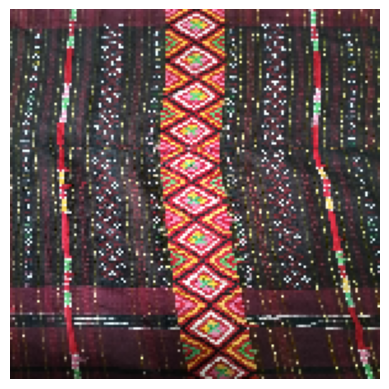

1/1 [==============================] - 0s 108ms/step
Predicted Class Label: Batak_Mandailing


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving 37.jpg to 37.jpg


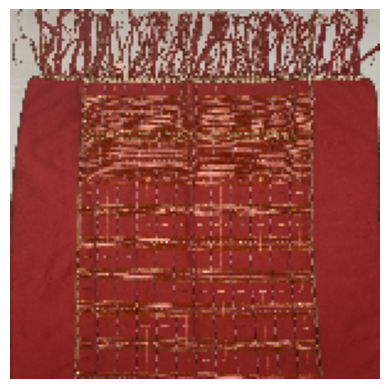

1/1 [==============================] - 0s 39ms/step
Predicted Class Label: Batak_Simalungun


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving 100.jpg to 100.jpg


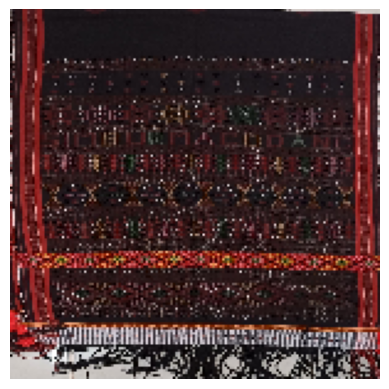

1/1 [==============================] - 0s 67ms/step
Predicted Class Label: Batak_Angkola


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving 72.jpg to 72.jpg


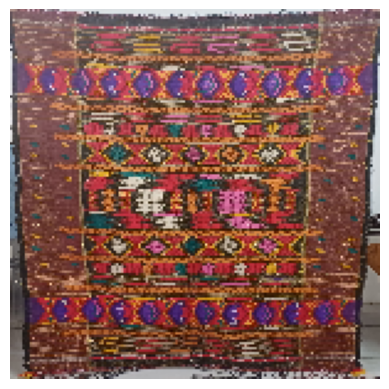

1/1 [==============================] - 0s 54ms/step
Predicted Class Label: Batak_Toba


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving 42.jpg to 42.jpg


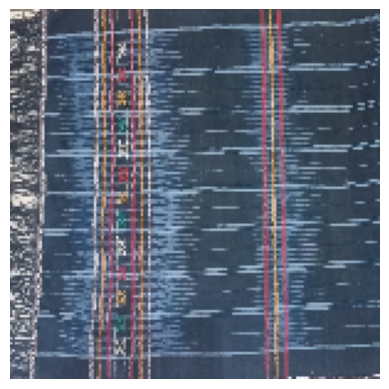

1/1 [==============================] - 0s 38ms/step
Predicted Class Label: Batak_PakPak


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving 87.jpg to 87.jpg


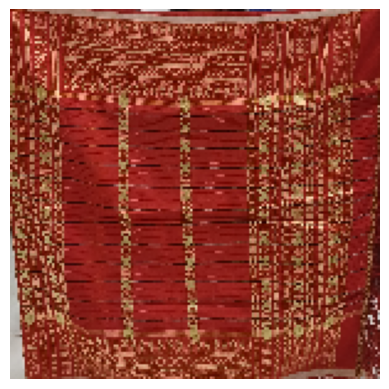

1/1 [==============================] - 0s 51ms/step
Predicted Class Label: Batak_Karo


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving google_pakpak.png to google_pakpak.png


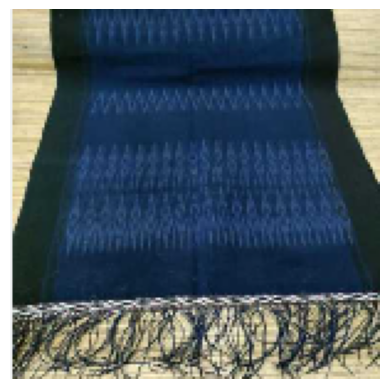

1/1 [==============================] - 0s 39ms/step
Predicted Class Label: Batak_PakPak


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving google_karo.png to google_karo.png


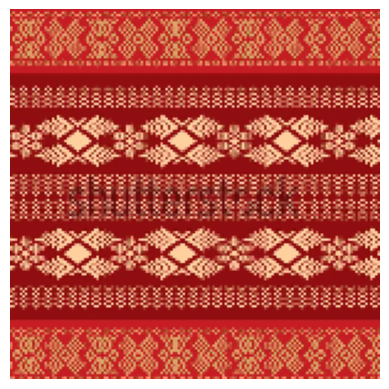

1/1 [==============================] - 0s 43ms/step
Predicted Class Label: Batak_Karo


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving google_simalungun.png to google_simalungun.png


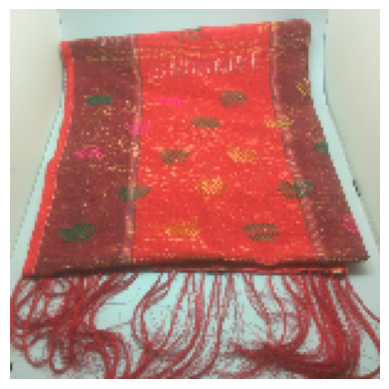

1/1 [==============================] - 0s 40ms/step
Predicted Class Label: Batak_Simalungun


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving google_toba.png to google_toba.png


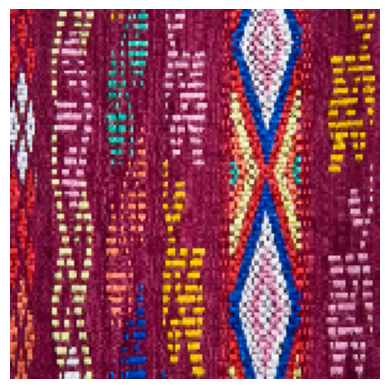

1/1 [==============================] - 0s 51ms/step
Predicted Class Label: Batak_Toba


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving google_angkola.png to google_angkola.png


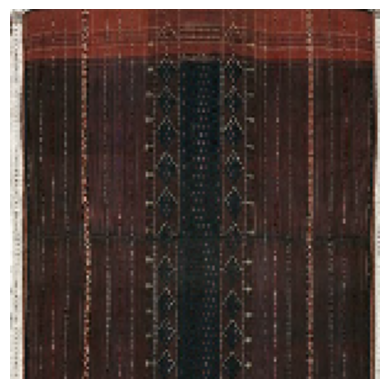

1/1 [==============================] - 0s 58ms/step
Predicted Class Label: Batak_Angkola


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving tes_batakmandailing.png to tes_batakmandailing.png


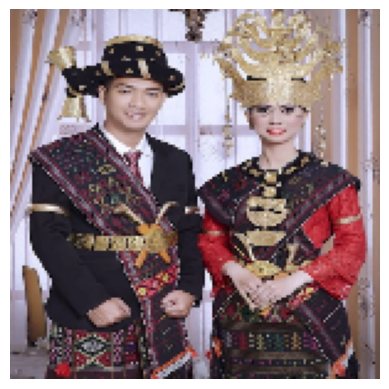

1/1 [==============================] - 0s 57ms/step
Predicted Class Label: Batak_Mandailing


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving google_b.toba.png to google_b.toba.png


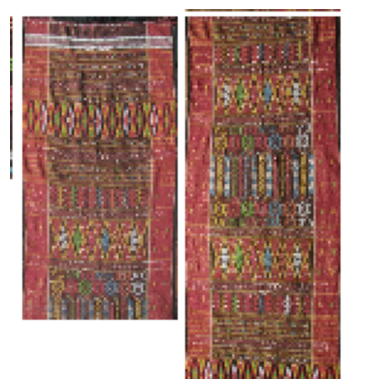

1/1 [==============================] - 0s 68ms/step
Predicted Class Label: Batak_Toba


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Saving tes_pakpak.png to tes_pakpak.png


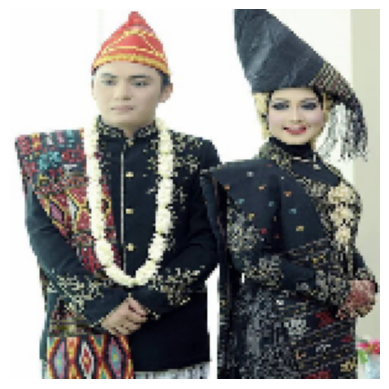

1/1 [==============================] - 0s 79ms/step
Predicted Class Label: Batak_PakPak


In [ ]:
# Prediksi pada gambar baru
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
new_image_path = f'/content/{file_name}'

# Menampilkan gambar yang diunggah
img = image.load_img(new_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

# Praproses gambar untuk model
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar

# Lakukan prediksi
predictions = model.predict(x)
predicted_class_index = np.argmax(predictions)

# Dapatkan kelas yang sesuai dari generator
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)
